In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from dolfin import *
from mshr import *

Lets make a half-space with an amorphous meshing: Fenics has tools for all this, so I will steal them:
https://fenicsproject.org/docs/dolfin/1.6.0/python/programmers-reference/cpp/mesh/MeshFunction.html
https://fenicsproject.org/docs/dolfin/2016.2.0/python/demo/documented/subdomains/python/documentation.html?highlight=inside



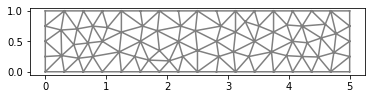

In [9]:
domain = Rectangle(dolfin.Point(0.0, 0.0),dolfin.Point(5.0,1.0))
mesh = generate_mesh(domain, 10)
plot(mesh)

In [15]:
File("mymesh.xml")<<mesh

Get the boundary of the mesh:
https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/subdomains/python/documentation.html

In [25]:
# a mesh function, which annotates the mesh
sub_domains_bool = MeshFunction("bool", mesh, mesh.topology().dim() - 1)

In [ ]:
sub_domains.set_all(False)

In [27]:
class ontheboundary(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary

In [21]:
outflow = Outflow()
ontheboundary.mark(sub_domains_bool, True)

In [22]:
# Mark no-slip facets as sub domain 0, 0.0
noslip = Noslip()
noslip.mark(sub_domains, 0)

In [23]:
# Save sub domains to file
file = File("subdomains.xml")
file << sub_domains